# Feature Engineering

In [12]:
conda install scikit-image

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/weatherford/opt/anaconda3/envs/learn-env

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cytoolz-0.11.0             |   py38haf1e3a3_0         294 KB
    dask-core-2022.7.0         |   py38hecd8cb5_0         1.7 MB
    fsspec-2022.7.1            |   py38hecd8cb5_0         208 KB
    locket-1.0.0               |   py38hecd8cb5_0          12 KB
    pywavelets-1.3.0           |   py38hca72f7f_0     

In [22]:
import pickle

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

In [2]:
# Load Data

with open('X_test.pkl','rb') as f:
    X_test = pickle.load(f)
    print(len(X_test))

with open('y_test.pkl','rb') as f:
    y_test = pickle.load(f)
    print(len(y_test))
    
with open('X_train.pkl','rb') as f:
    X_train = pickle.load(f)
    print(len(X_train))
    
with open('y_train.pkl','rb') as f:
    y_train = pickle.load(f)
    print(len(y_train))

459
459
4119
4119


## Rescale Image

In [111]:
xb = []
for x in X_train:
    xb.append(resize(x,(128,64,3)))
print(len(xb))

4119


[array([[[0.61553309, 0.51749387, 0.30474877],
         [0.62695312, 0.52778033, 0.29867494],
         [0.54673713, 0.44604779, 0.19231005],
         ...,
         [0.39055607, 0.31477482, 0.15457261],
         [0.4182598 , 0.34096201, 0.18183211],
         [0.45085018, 0.38152574, 0.18768382]],
 
        [[0.63337163, 0.53435202, 0.32748928],
         [0.56352635, 0.46339614, 0.2416973 ],
         [0.70343903, 0.60398284, 0.35514706],
         ...,
         [0.34655331, 0.26939338, 0.10791973],
         [0.43409926, 0.35889246, 0.19893536],
         [0.45225184, 0.37998621, 0.19762561]],
 
        [[0.57480852, 0.48180913, 0.2843367 ],
         [0.62034314, 0.52315411, 0.30762102],
         [0.6189951 , 0.52095588, 0.28134191],
         ...,
         [0.30675551, 0.23224571, 0.06547181],
         [0.36998315, 0.29547335, 0.1386106 ],
         [0.46374847, 0.38923866, 0.22186734]],
 
        ...,
 
        [[0.68088235, 0.54180453, 0.29319853],
         [0.63003983, 0.48772978, 0.25932

In [141]:
def Rescaler(X_array):
    xb = []
    for x in X_array:
        xb.append(resize(x, (128,64,3)))
    return xb

## Scale the test and train set pictures

In [142]:
X_train_scaled = Rescaler(X_train)

In [144]:
X_test_scaled = Rescaler(X_test)

In [153]:
#Verify that they are the correct lenght
print(len(X_train_scaled))
print(len(X_test_scaled))

4119
459


AxesImage(10.8,10.8;410.4x266.4)


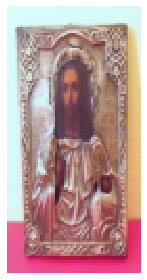

In [160]:
plt.axis("off")
print(imshow(X_train_scaled[1011]));

## HOG

(128, 64, 3)


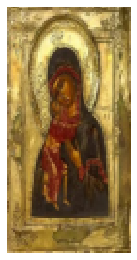

In [157]:
image_test = X_train_scaled[0]
imshow(image_test)
plt.axis("off")
print(image_test.shape)

[0.23592548 0.22063282 0.08722713 ... 0.01222817 0.12032402 0.22193548] (3780,)


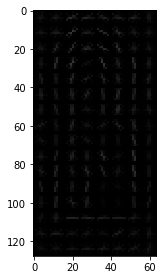

In [155]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
print(fd, fd.shape)
imshow(hog_image)

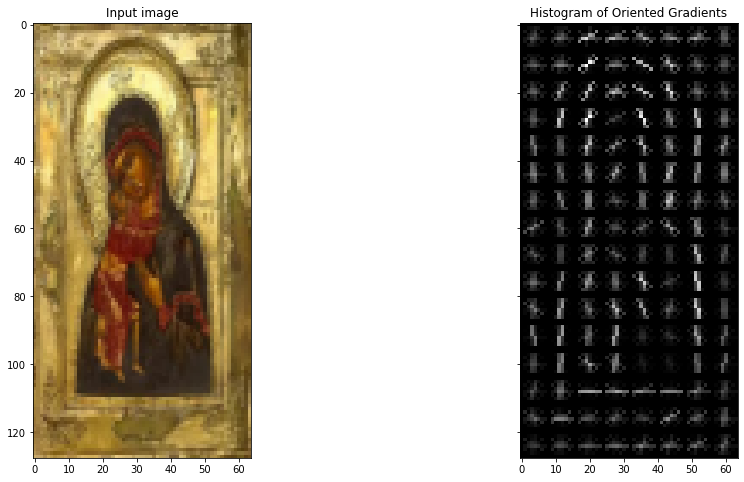

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

## Entropy

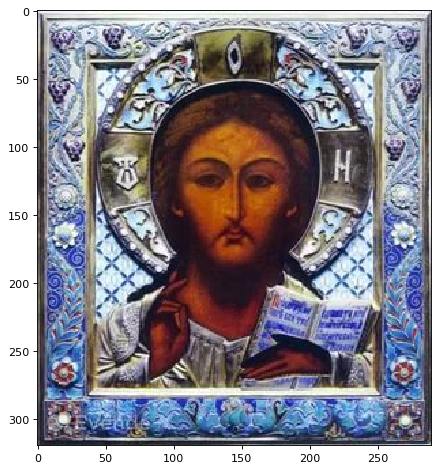

In [35]:
image_test2 = X_train[6]
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(image_test2);